In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Steps of Using Scikit-Learn API

1. Choose a class of model
2. Choose model hyperparameters
3. Make sure data is in the form of features matrix and target array
4. Fit model to data
5. Apply trained model to new data

# Supervised Learning: Simple Linear Regression


In [42]:
x = 10 * np.random.rand(100)

In [43]:
y = 5 * x + np.random.rand(100)

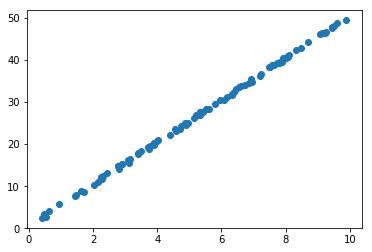

In [44]:
#plt.figure(figsize  = (10, 7))
plt.scatter(x, y)

# Step 1: Choose a class of model


In [45]:
from sklearn.linear_model import LinearRegression

# Step 2: Choose model hyperparameters

In [46]:
model = LinearRegression(fit_intercept=True)

In [47]:
LinearRegression?

In [48]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [49]:
x.shape

(100,)

# Step 3: Arrage data into features matrix and target array


In [50]:
X = x.reshape(-1, 1)

In [51]:
X.shape

(100, 1)

# Step 4: Fit model to data

In [52]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
model.coef_

array([4.99634351])

In [54]:
model.intercept_

0.5791092476013979

# Step 5: Apply trained model to new data

In [62]:
x_fit = np.linspace(-1, 11)

X_fit = x_fit.reshape(-1,1)

In [63]:
print(x_fit)

[-1.         -0.75510204 -0.51020408 -0.26530612 -0.02040816  0.2244898
  0.46938776  0.71428571  0.95918367  1.20408163  1.44897959  1.69387755
  1.93877551  2.18367347  2.42857143  2.67346939  2.91836735  3.16326531
  3.40816327  3.65306122  3.89795918  4.14285714  4.3877551   4.63265306
  4.87755102  5.12244898  5.36734694  5.6122449   5.85714286  6.10204082
  6.34693878  6.59183673  6.83673469  7.08163265  7.32653061  7.57142857
  7.81632653  8.06122449  8.30612245  8.55102041  8.79591837  9.04081633
  9.28571429  9.53061224  9.7755102  10.02040816 10.26530612 10.51020408
 10.75510204 11.        ]


In [64]:
y_fit = model.predict(X_fit)

# Let's see how our model looks like

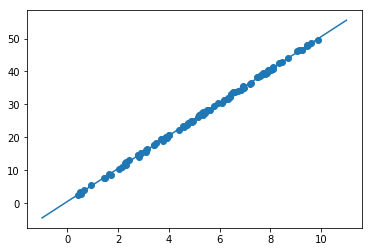

In [65]:
plt.scatter(x, y)
plt.plot(x_fit, y_fit)

# Let's try this out with a Real world example
We are gonna use the boston housing data

In [ ]:
boston = pd.read_csv('boston_house.csv')

In [ ]:
boston.head()

### This is how data actually represents
| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [ ]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
boston.columns = col_name

In [ ]:
boston.head()

# Exploratory Data Anaysis (EDA)

In [ ]:
boston.shape

In [ ]:
boston.describe()

In [ ]:
boston.info()

In [ ]:
boston.isnull().sum()

In [ ]:
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.pairplot(boston, size=1.5)
plt.show()

In [ ]:
col_study = ['RM', 'DIS', 'LSTAT', 'MEDV']

In [ ]:
sns.pairplot(boston[col_study], size=2.5)
plt.show()

# Check the correlation for our prediction target

In [ ]:
boston.corr()["MEDV"].abs().sort_values(ascending=False)

In [ ]:
boston.corr()

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(boston.corr(), annot=True, cmap='Purples')
plt.show()

In [ ]:
sns.heatmap?

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'MEDV']].corr(), annot = True, cmap = 'magma_r')
plt.show()

# Let's get started with Linear Regression

In [ ]:
X = boston['RM'].values.reshape(-1, 1)

y = boston['MEDV'].values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)

In [ ]:
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
plt.figure(figsize=(12,10))
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

### https://rpsychologist.com/d3/correlation/

In [ ]:
X = boston['LSTAT'].values.reshape(-1, 1)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
plt.figure(figsize=(12,10))
sns.regplot(X, y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

# Robust Regression

In [ ]:
boston.head()

# RANdom SAmple Consensus (RANSAC) Algorithm

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [ ]:
X = boston['LSTAT'].values.reshape(-1,1)
y = boston['MEDV'].values# Performance Evaluation of Regression Modelfrom sklearn.model_selection import train_test_split#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
robust = RANSACRegressor()

In [ ]:
robust.fit(X,y)

In [ ]:
inlier_mask = robust.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [ ]:
line_X = np.arange(0, 40, 1)
line_y_robust = robust.predict(line_X.reshape(-1, 1))

In [ ]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_robust, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [ ]:
robust.estimator_.coef_

In [ ]:
robust.estimator_.intercept_

In [ ]:
X = boston['RM'].values.reshape(-1,1)
y = boston['MEDV'].values
robust.fit(X, y)
inlier_mask = robust.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_robust = robust.predict(line_X.reshape(-1, 1))

In [ ]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_robust, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

In [ ]:
robust.estimator_.coef_

In [ ]:
robust.estimator_.intercept_

# Performance Evaluation of Regression Model

## Lets try on a sample data first

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(500)
y = 3 * x + np.random.randn(500)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))

y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-5, 5])
plt.show()

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred)

In [ ]:
mean_squared_error(y_test, y_test_pred)

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

In [ ]:
r2_score(y_test, y_test_pred)

# Let's experiment on boston data

In [ ]:
X = boston['RM'].values.reshape(-1,1)

y = boston['MEDV'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
# Residual analysis

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

In [ ]:
# Mean squeare error

mean_squared_error(y_train, y_train_pred)

In [ ]:
mean_squared_error(y_test, y_test_pred)

In [ ]:
# coefficient of determination (r2)

r2_score(y_train, y_train_pred)

In [ ]:
r2_score(y_test, y_test_pred)